<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/clustering_temperatures_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

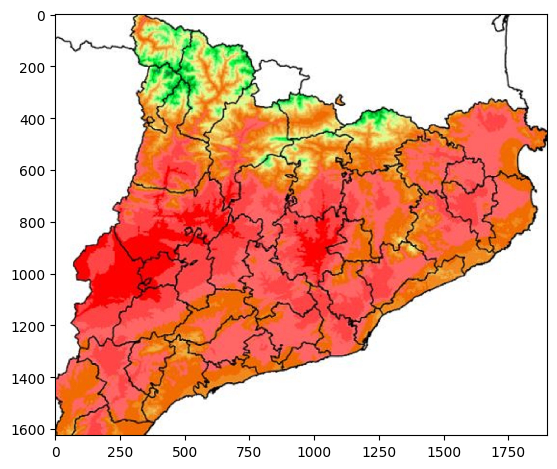

In [12]:
import skimage as sk
import numpy as np

from skimage.io import imread
I = sk.io.imread('/content/cat_temp.jpeg') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

In [13]:
I.shape

(1625, 1900, 3)

In [16]:
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The sape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape

Here N = 3087500 and d = 3
The sape of the array should be 3087500 x 3


(3087500, 3)

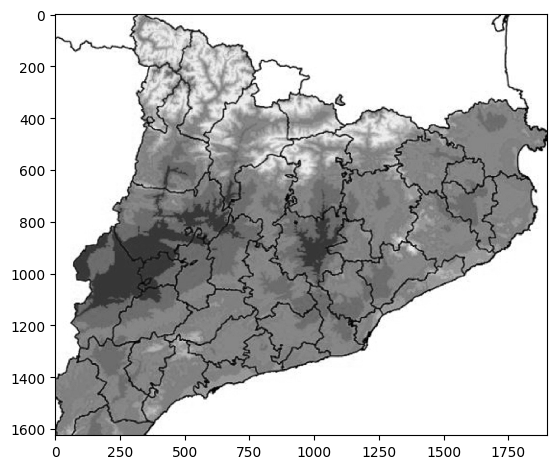

(1625, 1900)

In [17]:
from skimage.color import rgb2gray
IG = rgb2gray(I)
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()
IG.shape

(3087500, 1)

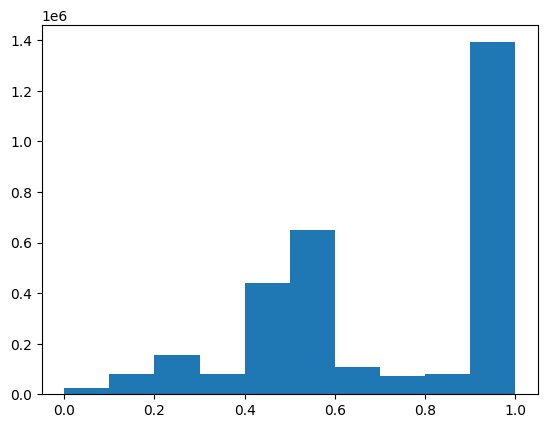

In [22]:
import matplotlib.pyplot as plt

v_I1d = np.reshape(IG,(IG.shape[0]*IG.shape[1],1)) # reshape image as NPIX x NCHANNELS array
plt.hist(v_I1d)
v_I1d.shape

In [23]:
from sklearn.cluster import KMeans

group = KMeans(n_clusters=3).fit_predict(v_I1d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
group.shape

(3087500,)

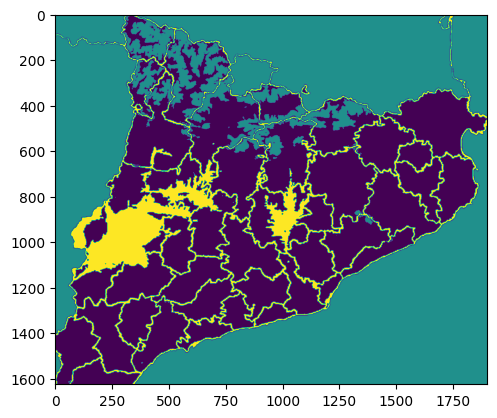

In [25]:
I_kmeans = np.reshape(group,(IG.shape[0],IG.shape[1]))
plt.imshow(I_kmeans)

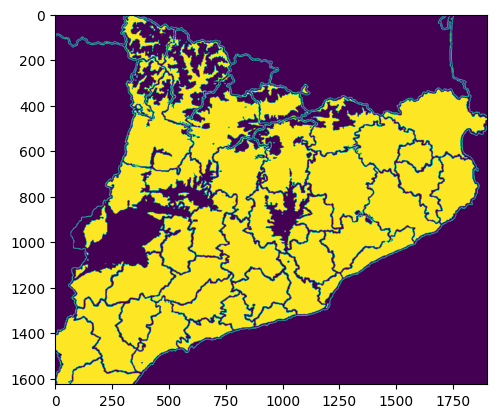

In [27]:
plt.imshow(I_kmeans==0)

Identificar numero de zonas con temeraturas diferentes utilizando GMM + BIC

[999329.738128486]
[999329.738128486, -9866424.273403853]
[999329.738128486, -9866424.273403853, -9886825.490087334]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.742262164]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.742262164, -11996689.322153555]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.742262164, -11996689.322153555, -12011575.096075816]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.742262164, -11996689.322153555, -12011575.096075816, -12021796.15512257]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.742262164, -11996689.322153555, -12011575.096075816, -12021796.15512257, -12062124.61100173]
[999329.738128486, -9866424.273403853, -9886825.490087334, -10747023.965515789, -11170509.7

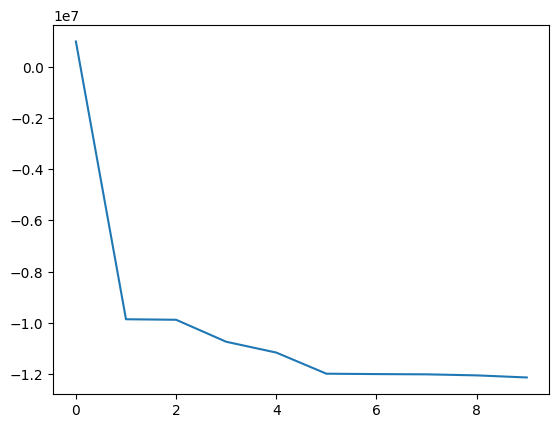

In [29]:
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_I1d)
    bic.append(gmm.bic(v_I1d))
    print(bic)

plt.plot(bic)

Seleccionar modelo ganador

...and the winner is GMM model G = 10


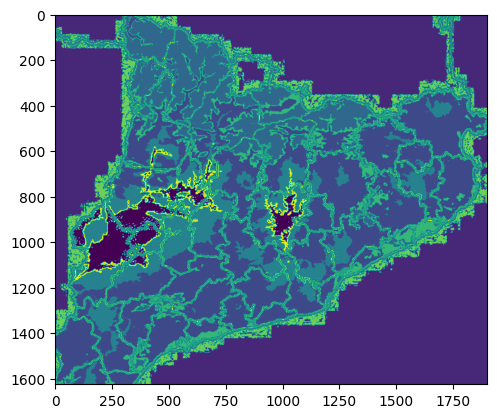

In [30]:
idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_I1d)
gmm_cluster = gmm.fit_predict(v_I1d)

I_gmm = np.reshape(gmm_cluster,(IG.shape[0],IG.shape[1]))
plt.imshow(I_gmm)